<a href="https://colab.research.google.com/github/ZackAkil/stateful-object-tracking/blob/main/v2_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/v1_68/labels.json

--2023-06-02 12:51:14--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/v1_68/labels.json
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/v1_68/labels.json [following]
--2023-06-02 12:51:14--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/v1_68/labels.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322292 (315K) [text/plain]
Saving to: ‘labels.json’

labels.json         100%[===================>] 314.74K  --.-KB/s    in 0.03s   

2023-06-02 12:51:15 (9.43 MB/s) - ‘labels.json’ saved [322292/322292]



In [27]:
!wget https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/all.zip

--2023-06-02 14:43:07--  https://github.com/ZackAkil/stateful-object-tracking/raw/main/training_data/68/all.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/all.zip [following]
--2023-06-02 14:43:07--  https://raw.githubusercontent.com/ZackAkil/stateful-object-tracking/main/training_data/68/all.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87591426 (84M) [application/zip]
Saving to: ‘all.zip’

all.zip             100%[===================>]  83.53M   224MB/s    in 0.4s    

2023-06-02 14:43:08 (224 MB/s) - ‘all.zip’ saved [87591426/

In [29]:
!mkdir images

In [33]:
!unzip -q all.zip -d images

In [9]:
from pycocotools.coco import COCO

# Provide the path to the annotation file
annotation_file = '/content/labels.json'

# Create a Coco object and load the annotations
coco = COCO(annotation_file)



loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [10]:
coco.imgs[0]

{'width': 2688,
 'height': 1512,
 'id': 0,
 'file_name': 'images/b570360e-output_067.png'}

In [14]:
annotation_ids = coco.getAnnIds(imgIds=0)

In [15]:
annotation_ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [16]:
annotations = coco.loadAnns(annotation_ids)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [47]:
original_height = coco.imgs[0]['height']
original_widht = coco.imgs[0]['width']

In [51]:
for a in annotations:
  print([a['bbox'][0] / original_widht,
         a['bbox'][1] / original_height,
         a['bbox'][2] / original_widht,
         a['bbox'][3] / original_height])

[0.3764044943820225, 0.39767054908485855, 0.014044943820224717, 0.05324459234608984]
[0.5252808988764045, 0.2712146422628951, 0.010299625468164793, 0.04159733777038269]
[0.20599250936329588, 0.8951747088186356, 0.027153558052434457, 0.06988352745424291]
[0.3539325842696629, 0.8252911813643926, 0.019662921348314606, 0.06821963394342762]
[0.5280898876404494, 0.6256239600665557, 0.011235955056179777, 0.05657237936772045]
[0.5795880149812733, 0.5307820299500832, 0.014044943820224717, 0.05158069883527454]
[0.6441947565543072, 0.49251247920133107, 0.009363295880149815, 0.059900166389351084]
[0.6676029962546817, 0.4126455906821963, 0.009363295880149815, 0.048252911813643926]
[0.7125468164794007, 0.36605657237936773, 0.011235955056179777, 0.05324459234608984]
[0.7649812734082397, 0.2828618968386024, 0.008426966292134831, 0.04159733777038269]
[0.5664794007490637, 0.27287853577371046, 0.012172284644194757, 0.048252911813643926]
[0.3679775280898877, 0.11980033277870217, 0.007490636704119851, 0.03

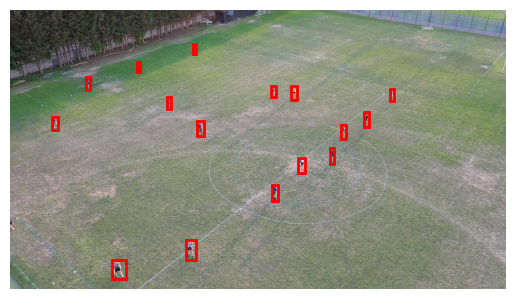

In [49]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# List of bounding box coordinates
bbox_list = [a['bbox'] for a in annotations]

# # Load and display the image using Matplotlib
image_path = 'images/' + coco.imgs[0]['file_name'].split('-')[-1]  # Replace with the actual image path
image = plt.imread(image_path)
i_height, i_width, _ = image.shape

scale_height = i_height /original_height  
scale_width = i_width/ original_widht  

plt.imshow(image)

# Create patches for each bounding box and add them to the plot
for bbox in bbox_list:
    x, y, width, height = [bbox[0]* scale_width , 
                           bbox[1]* scale_height,
                           bbox[2]* scale_width,
                           bbox[3]* scale_height]
    rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Display the plot
plt.axis('off')
plt.show()